In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from IPython.display import display

In [2]:
# Reading dataframe

df=pd.read_csv('databreach.csv', encoding='iso-8859-1')
# Select relevant features
df=df[['ï»¿Entity','story','YEAR(2)','records lost','ORGANISATION','METHOD OF LEAK','DATA SENSITIVITY']]

df['METHOD OF LEAK']=df['METHOD OF LEAK'].replace('lost / stolen device or media','lost/stolen')
df=df.rename(columns={'ï»¿Entity':'Entity'})
df=df.rename(columns={'YEAR(2)':'Year'})
df

,Entity,story,Year,records lost,ORGANISATION,METHOD OF LEAK,DATA SENSITIVITY
0,AOL,A former America Online software engineer stol...,2004,9.200000e+07,web,inside job,1
1,Cardsystems Solutions Inc.,CardSystems was fingered by MasterCard after i...,2005,4.000000e+07,financial,hacked,300
2,Ameritrade Inc.,online broker,2005,2.000000e+05,financial,lost/stolen,20
3,Citigroup,Blame the messenger! A box of computer tapes c...,2005,3.900000e+06,financial,lost/stolen,300
4,Automatic Data Processing,NaN,2005,1.250000e+05,financial,poor security,20
...,...,...,...,...,...,...,...
272,Aadhaar,Mar. A security researcher discovered a system...,2018,1.100000e+09,government,poor security,4000
273,Saks and Lord & Taylor,Apr. A known ring of cybercriminals implanted ...,2018,5.000000e+06,retail,hacked,300
274,Panerabread,Customer records were available via the site f...,2018,3.700000e+07,retail,poor security,20
275,MyFitnessPal,"Feb. Usernames, email addresses, and hashed us...",2018,1.500000e+08,app,hacked,1


In [8]:
df['METHOD OF LEAK'].value_counts()

hacked                    171
lost/stolen                50
inside job                 19
poor security              19
accidentally published     18
Name: METHOD OF LEAK, dtype: int64

In [3]:
# Combine relevant types together
df=df.groupby('ORGANISATION').filter(lambda x : len(x)>3)
df['ORGANISATION']=df['ORGANISATION'].replace(['app','gaming','telcoms'],'internet involvement')
df['ORGANISATION']=df['ORGANISATION'].replace(['academic','military'],'government')
df['ORGANISATION'].value_counts()

web                     78
government              55
healthcare              37
financial               33
retail                  18
internet involvement    15
telecoms                10
tech                    10
Name: ORGANISATION, dtype: int64

In [4]:
print(df.dtypes,"\n")

Entity               object
story                object
Year                  int64
records lost        float64
ORGANISATION         object
METHOD OF LEAK       object
DATA SENSITIVITY      int64
dtype: object 



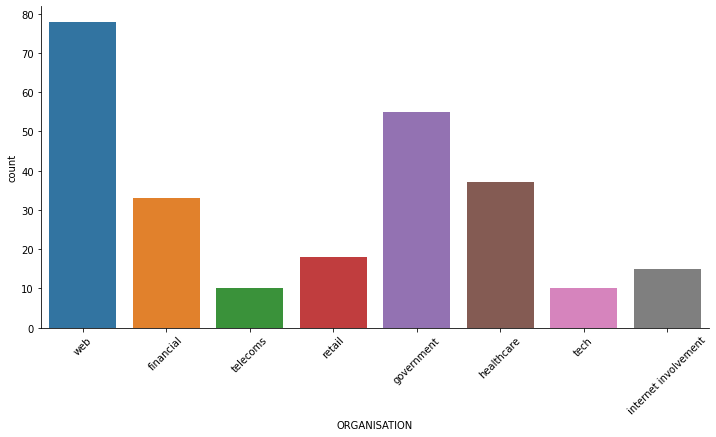

In [5]:
# Visualise types of organisation distribution
sb.catplot(x="ORGANISATION",
                data=df,
                kind="count",height=5 ,aspect=2)
plt.xticks(rotation=45)
plt.show()

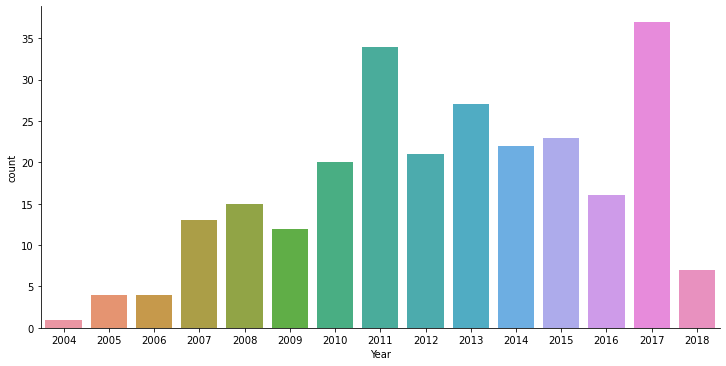

In [6]:
# Visualise no. incidents per year
sb.catplot(x="Year",
                data=df,
                kind="count",height=5 ,aspect=2)

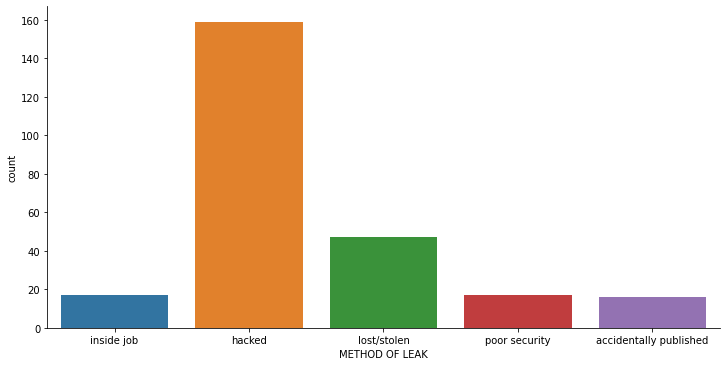

In [7]:
# Visualise types of methods of leak
sb.catplot(x="METHOD OF LEAK",
                data=df,
                kind="count",height=5 ,aspect=2)

<ipython-input-8-9037326678af>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['10','100','1000','10000','100,000','1,000,000','10mil','100mil','10bil','1tril','100tril'])


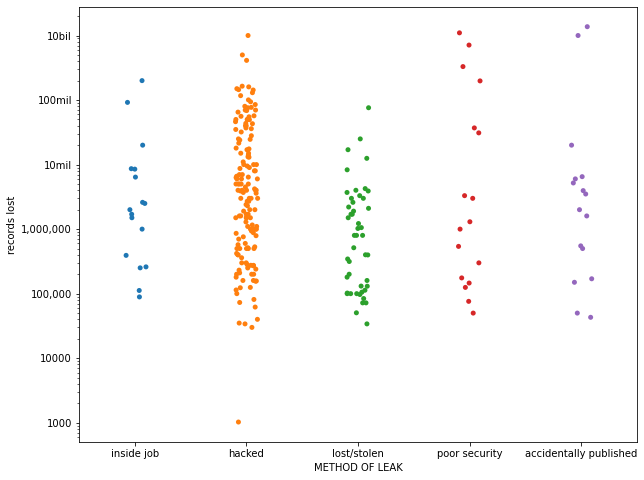

In [8]:
# Visualise method of leak to records lost

f,ax=plt.subplots(figsize=(10,8))
sb.stripplot(x='METHOD OF LEAK',y='records lost',data=df)
ax.set(yscale="log")
ax.set_yticklabels(['10','100','1000','10000','100,000','1,000,000','10mil','100mil','10bil','1tril','100tril'])
plt.show()

# Machine Learning

In [9]:
# Import machine learning libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import KFold ,StratifiedKFold
from sklearn.compose import ColumnTransformer

# Modelling a Regressor

In [10]:
# Predict possible records lost 

df2=df[['METHOD OF LEAK','records lost','ORGANISATION','Year','DATA SENSITIVITY']]
df2=df2.dropna()
df2.reset_index(drop=True,inplace=True)
df2=df2.astype('category')

In [11]:
X=df2[['METHOD OF LEAK','ORGANISATION','Year','DATA SENSITIVITY']]
y=df2['records lost']

In [12]:
print(X.shape,y.shape)

(254, 4) (254,)


In [13]:
# Model building

# Encode categorical variable
enc=OneHotEncoder(sparse=False)
enc=enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(enc, y, test_size=0.2,random_state=111) 

In [14]:
k=KNeighborsRegressor(n_neighbors=1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(203, 34) (203,)
(51, 34) (51,)


In [15]:
# Fit model and predict

k.fit(X_train,y_train)
print("Model train score: {}".format(k.score(X_train,y_train)))
print("Model test score: {}".format(k.score(X_test,y_test)))
print("Cross val score: {}".format(cross_val_score(k,X_train,y_train).mean()))
y_pred=k.predict(X_test)

Model train score: 0.895637340821516
Model test score: -0.4164364159643452
Cross val score: -1.222245719589989


In [16]:
# Accuracy test for no. neighbors param from 1-10

parameter_range = np.arange(1, 10, 1)
train_score, test_score = validation_curve(KNeighborsRegressor(), enc, y,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 5)

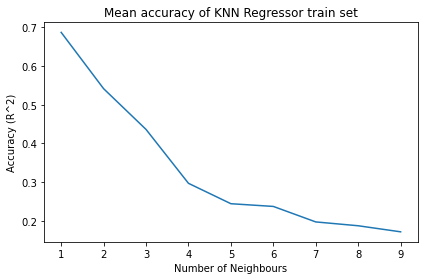

In [17]:
# Calculating mean  of training and test score
mean_train_score = np.mean(train_score, axis = 1)
mean_test_score = np.mean(test_score, axis = 1)

 
# Plot mean accuracy scores for training set
plt.plot(parameter_range,mean_train_score,)
plt.title("Mean accuracy of KNN Regressor train set")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy (R^2)")
plt.tight_layout()

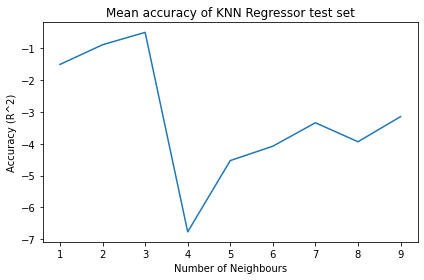

In [18]:
plt.plot(parameter_range,mean_test_score,)
plt.title("Mean accuracy of KNN Regressor test set")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy (R^2)")
plt.tight_layout()

# Modelling a Classifier

In [19]:
# Predict type organisation to be targeted based on year of attack

X2=df2[['Year']]
Y2=df2['ORGANISATION']

In [20]:
# Building a decision tree classifier

X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2,random_state=111) 
print('Training size: {},{}, Test size: {},{}\n'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))
clf=DecisionTreeClassifier(random_state=2)
clf.fit(X_train,y_train)
print('Train score: {}'.format(clf.score(X_train,y_train)))
print('Test score : {}'.format(clf.score(X_test,y_test)),'\n')
y_pred=clf.predict(X_test)

Training size: (203, 1),(203,), Test size: (51, 1),(51,)

Train score: 0.4433497536945813
Test score : 0.35294117647058826 



In [21]:
# Cross validate training data 
kf = StratifiedKFold(n_splits=5)
cross_val_score(clf,X_train,y_train, cv=kf).mean()

0.3545121951219512

In [22]:
# Accuracy of predicted data
accuracy_score(y_test,y_pred)

0.35294117647058826

In [23]:
# Predicted vs actual
pred,actual=y_pred.tolist(),y_test.tolist()
temp = list(zip(pred,actual))
temp[:10]

[('web', 'web'),
 ('retail', 'internet involvement'),
 ('web', 'retail'),
 ('web', 'financial'),
 ('government', 'government'),
 ('government', 'retail'),
 ('web', 'web'),
 ('government', 'financial'),
 ('government', 'tech'),
 ('web', 'government')]

In [24]:
# Check if there is a change in trend of attacks targeting specific organisations over the years
k=2004
for i in range(15):
    print(clf.predict([[k]]))
    k=k+1

['web']
['financial']
['telecoms']
['government']
['government']
['government']
['healthcare']
['healthcare']
['web']
['web']
['web']
['web']
['web']
['web']
['retail']
